In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from bellem.dvc.experiment import load_experiments

experiments = load_experiments('qa-prompt-optim-hotpotqa.json')
print(f"{len(experiments)} experiments")
experiments[0]

13 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'train': {'dataset': {'path': 'bdsaglam/musique-mini',
    'name': 'answerable',
    'split': 'train'},
   'optimizer': 'noop'},
  'qa': {'model': 'llama-3-70b-tgi',
   'temperature': 0.1,
   'technique': 'standard'},
  'evaluation': {'dataset': {'path': 'bdsaglam/hotpotqa-distractor',
    'name': 'default',
    'split': 'validation'}},
  'run': 1},
 'metrics': {'exact_match': 0.55,
  'f1': 0.6629834609834611,
  'fuzzy_match': 0.61,
  '2hops': {'exact_match': 0.6, 'f1': 0.7348075258075258, 'fuzzy_match': 0.68},
  '3hops': {'exact_match': 0.59,
   'f1': 0.6825476190476191,
   'fuzzy_match': 0.64},
  '4hops': {'exact_match': 0.46,
   'f1': 0.5715952380952382,
   'fuzzy_match': 0.51}}}

In [3]:
df = pd.json_normalize(experiments).drop(columns=["commit", "id"])

param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
# df.drop_duplicates(subset=param_cols, inplace=True)

df = df[~df['name'].isin([None])].copy()
df = df[df['params.evaluation.dataset.path']=='bdsaglam/hotpotqa-distractor'].copy()
df.reset_index(drop=True, inplace=True)
df

,name,params.train.dataset.path,params.train.dataset.name,params.train.dataset.split,params.train.optimizer,params.qa.model,params.qa.temperature,params.qa.technique,params.evaluation.dataset.path,params.evaluation.dataset.name,...,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match,metrics.3hops.exact_match,metrics.3hops.f1,metrics.3hops.fuzzy_match,metrics.4hops.exact_match,metrics.4hops.f1,metrics.4hops.fuzzy_match
0,alpha-jags,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/hotpotqa-distractor,default,...,0.705874,0.642809,0.802970,0.705874,NaN,NaN,NaN,NaN,NaN,NaN
1,toned-halm,bdsaglam/musique-mini,answerable,train,miprov2-light,llama-3-70b-tgi,0.1,cte,bdsaglam/hotpotqa-distractor,default,...,0.705874,0.642809,0.802970,0.705874,NaN,NaN,NaN,NaN,NaN,NaN
2,rimed-pice,bdsaglam/musique-mini,answerable,train,bfs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/hotpotqa-distractor,default,...,0.710601,0.664956,0.814455,0.710601,NaN,NaN,NaN,NaN,NaN,NaN
3,flown-bate,bdsaglam/musique-mini,answerable,train,miprov2-light,llama-3-70b-tgi,0.1,cot,bdsaglam/hotpotqa-distractor,default,...,0.706820,0.658204,0.810255,0.706820,NaN,NaN,NaN,NaN,NaN,NaN
4,truer-term,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,cot,bdsaglam/hotpotqa-distractor,default,...,0.708575,0.662120,0.811369,0.708575,NaN,NaN,NaN,NaN,NaN,NaN
5,cagey-scab,bdsaglam/musique-mini,answerable,train,bfs-medium,llama-3-70b-tgi,0.1,cot,bdsaglam/hotpotqa-distractor,default,...,0.707360,0.661715,0.813235,0.707360,NaN,NaN,NaN,NaN,NaN,NaN
6,heady-ceps,bdsaglam/musique-mini,answerable,train,miprov2-light,llama-3-70b-tgi,0.1,standard,bdsaglam/hotpotqa-distractor,default,...,0.711141,0.664146,0.811785,0.711141,NaN,NaN,NaN,NaN,NaN,NaN
7,buggy-cors,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,standard,bdsaglam/hotpotqa-distractor,default,...,0.709791,0.666442,0.811329,0.709791,NaN,NaN,NaN,NaN,NaN,NaN
8,lushy-data,bdsaglam/musique-mini,answerable,train,noop,llama-3-70b-tgi,0.1,cte,bdsaglam/hotpotqa-distractor,default,...,0.705874,0.642809,0.802970,0.705874,NaN,NaN,NaN,NaN,NaN,NaN
9,dated-nine,bdsaglam/musique-mini,answerable,train,bfs-medium,llama-3-70b-tgi,0.1,standard,bdsaglam/hotpotqa-distractor,default,...,0.710601,0.664281,0.811779,0.710601,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
target_params = ["params.qa.technique", "params.train.optimizer", "params.qa.temperature"]

In [5]:
run_counts = df.groupby(target_params)[metric_cols[:1]].count().reset_index()
mask = run_counts[metric_cols[0]] < 3
run_counts.loc[mask]

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match
0,cot,bfs-medium,0.1,1
1,cot,bfsrs-medium,0.1,1
2,cot,miprov2-light,0.1,1
3,cot,noop,0.1,1
4,cte,bfs-medium,0.1,1
5,cte,bfsrs-medium,0.1,1
6,cte,miprov2-light,0.1,1
7,cte,noop,0.1,1
8,standard,bfs-medium,0.1,1
9,standard,bfsrs-medium,0.1,1


In [6]:
# Average metrics over repeated runs (params.run)
df_avg = df.groupby(target_params)[metric_cols].max().reset_index()
df_avg[[*target_params, *metric_cols]].sort_values("metrics.f1")

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match,metrics.3hops.exact_match,metrics.3hops.f1,metrics.3hops.fuzzy_match,metrics.4hops.exact_match,metrics.4hops.f1,metrics.4hops.fuzzy_match
11,standard,noop,0.1,0.631870,0.792634,0.701553,0.631870,0.792634,0.701553,NaN,NaN,NaN,NaN,NaN,NaN
3,cot,noop,0.1,0.632546,0.795942,0.706550,0.632546,0.795942,0.706550,NaN,NaN,NaN,NaN,NaN,NaN
5,cte,bfsrs-medium,0.1,0.642809,0.802970,0.705874,0.642809,0.802970,0.705874,NaN,NaN,NaN,NaN,NaN,NaN
6,cte,miprov2-light,0.1,0.642809,0.802970,0.705874,0.642809,0.802970,0.705874,NaN,NaN,NaN,NaN,NaN,NaN
7,cte,noop,0.1,0.642809,0.802970,0.705874,0.642809,0.802970,0.705874,NaN,NaN,NaN,NaN,NaN,NaN
2,cot,miprov2-light,0.1,0.658204,0.810255,0.706820,0.658204,0.810255,0.706820,NaN,NaN,NaN,NaN,NaN,NaN
9,standard,bfsrs-medium,0.1,0.666442,0.811329,0.709791,0.666442,0.811329,0.709791,NaN,NaN,NaN,NaN,NaN,NaN
1,cot,bfsrs-medium,0.1,0.662120,0.811369,0.708575,0.662120,0.811369,0.708575,NaN,NaN,NaN,NaN,NaN,NaN
8,standard,bfs-medium,0.1,0.664281,0.811779,0.710601,0.664281,0.811779,0.710601,NaN,NaN,NaN,NaN,NaN,NaN
10,standard,miprov2-light,0.1,0.664146,0.811785,0.711141,0.664146,0.811785,0.711141,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_target = df_avg.copy()
df_target.sort_values('metrics.f1', inplace=True)

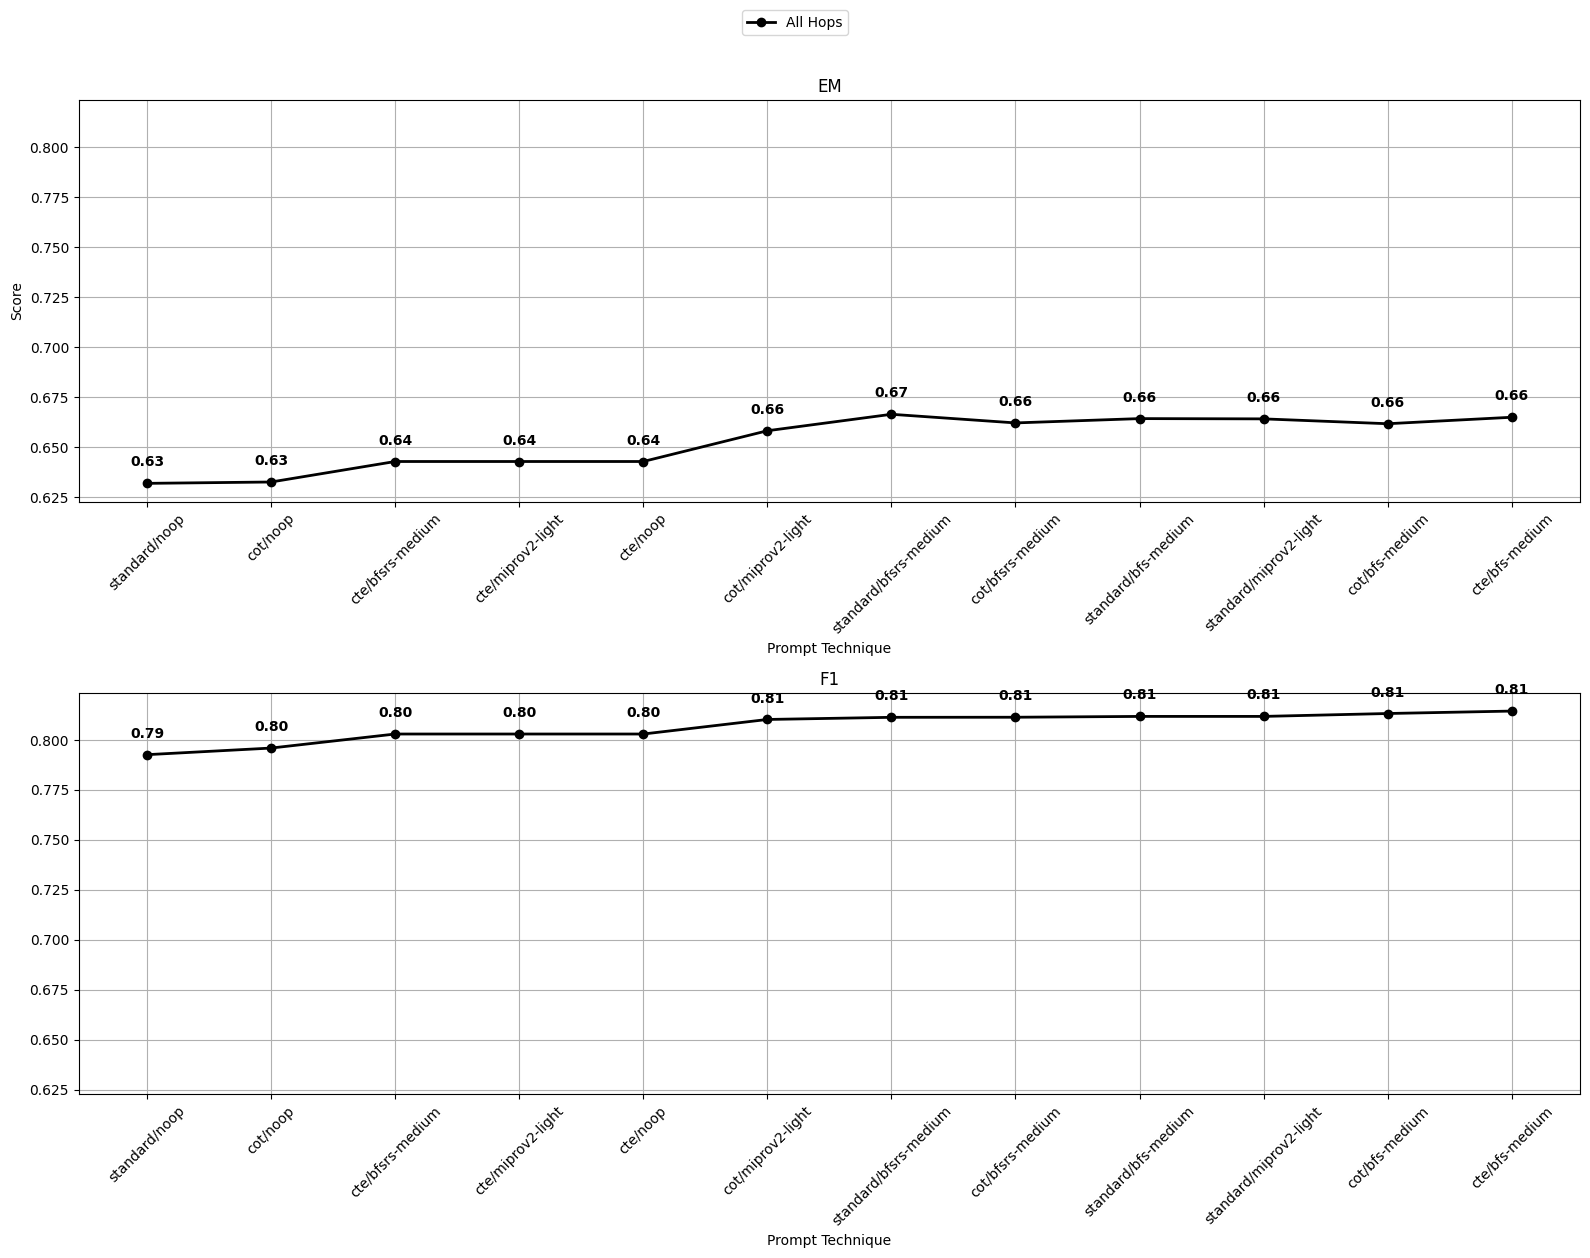

In [10]:
def plot_metric(ax, x, width, prompts, metrics, title, ylabel=None):
    # Plotting all hops as a line plot
    ax.plot(x, metrics["all"], label="All Hops", color="k", linestyle="-", marker="o", linewidth=2)

    # Adding values on top of the line plot
    for i, value in enumerate(metrics["all"]):
        ax.text(
            x[i],
            value + 0.007,
            f"{value:.2f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Adjust titles and labels
    ax.set_title(title)
    ax.set_xlabel("Prompt Technique")
    ax.set_xticks(x)
    ax.set_xticklabels([prompt.replace(".txt", "") for prompt in prompts], rotation=45)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.grid(True)


# Creating subplots for Exact Match and F1, separating them for clarity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharey=True)

width = 0.3  # Bar width adjustment

prompts = [
    f"{pt}/{optim}"
    for pt, optim in zip(df_target["params.qa.technique"].values, df_target["params.train.optimizer"].values)
]
x = np.arange(len(prompts))


# Plotting Exact Match
metrics_em = {
    "all": df_target["metrics.exact_match"].values,
}
plot_metric(ax1, x, width, prompts, metrics_em, title="EM", ylabel="Score")

# Plotting F1
metrics_f1 = {
    "all": df_target["metrics.f1"].values,
}
plot_metric(ax2, x, width, prompts, metrics_f1, title="F1")

# Creating a shared legend outside the plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)

plt.tight_layout()
plt.show()